<a href="https://colab.research.google.com/github/jothika-12/DS-HACKATHON/blob/ds-file/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
train = pd.read_csv("/content/C&T train dataset.csv")
test = pd.read_csv("/content/C&T test dataset.csv")

In [ ]:
train.shape

(800, 21)

In [ ]:
test.shape

(200, 20)

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    int64  
 2   duration_month    800 non-null    float64
 3   credit_history    800 non-null    int64  
 4   purpose           800 non-null    int64  
 5   savings_acc       800 non-null    int64  
 6   employment_st     800 non-null    int64  
 7   poi               800 non-null    object 
 8   personal_status   800 non-null    int64  
 9   gurantors         800 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    int64  
 12  age               800 non-null    float64
 13  installment_type  800 non-null    int64  
 14  housing_type      800 non-null    object 
 15  credits_no        800 non-null    float64
 16  job_type          800 non-null    int64  
 1

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               200 non-null    int64  
 1   acc_info          200 non-null    object 
 2   duration_month    200 non-null    int64  
 3   credit_history    200 non-null    object 
 4   purpose           200 non-null    object 
 5   savings_acc       200 non-null    object 
 6   employment_st     195 non-null    object 
 7   poi               195 non-null    float64
 8   personal_status   200 non-null    object 
 9   gurantors         200 non-null    object 
 10  resident_since    200 non-null    int64  
 11  property_type     200 non-null    object 
 12  age               198 non-null    float64
 13  installment_type  200 non-null    object 
 14  housing_type      192 non-null    object 
 15  credits_no        200 non-null    int64  
 16  job_type          200 non-null    object 
 1

In [ ]:
train.describe()

,sno,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.0000,800.00000,788.000000,800.000000,796.000000,800.000000,800.000000,800.000000
mean,400.5000,20.65125,2.950508,2.841250,35.408291,1.396250,1.147500,2.076250
std,231.0844,12.15635,1.130084,1.106833,11.499101,0.569773,0.354825,0.744062
min,1.0000,4.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,200.7500,12.00000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000
50%,400.5000,18.00000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000
75%,600.2500,24.00000,4.000000,4.000000,41.000000,2.000000,1.000000,3.000000
max,800.0000,72.00000,4.000000,4.000000,75.000000,4.000000,2.000000,3.000000


In [ ]:
test.describe()

,sno,duration_month,poi,resident_since,age,credits_no,liables
count,200.000000,200.000000,195.000000,200.000000,198.000000,200.000000,200.000000
mean,100.500000,21.910000,2.974359,2.860000,36.106061,1.450000,1.185000
std,57.879185,11.635671,1.081408,1.093792,11.053808,0.607739,0.389272
min,1.000000,4.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,50.750000,12.000000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,100.500000,20.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,150.250000,27.250000,4.000000,4.000000,43.000000,2.000000,1.000000
max,200.000000,60.000000,4.000000,4.000000,68.000000,4.000000,2.000000


In [ ]:
train.head()

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1


In [ ]:
test.head()

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201


In [73]:
train.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

In [74]:
test.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

In [ ]:
train['acc_info'].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [ ]:
account = {'A11': 1, 'A12': 2, 'A13': 3, 'A14': 4}

# Check if all keys in the account dictionary exist in the 'acc_info' column
if set(account.keys()).issubset(train['acc_info'].unique()) and set(account.keys()).issubset(test['acc_info'].unique()):
    train['acc_info'] = train['acc_info'].replace(account)
    test['acc_info'] = test['acc_info'].replace(account)
else:
    print("Error: One or more keys in the account dictionary do not exist in the 'acc_info' column.")


Error: One or more keys in the account dictionary do not exist in the 'acc_info' column.


In [ ]:
train['duration_month'].sort_values()

234     4
314     4
734     4
527     4
430     5
       ..
255    60
616    60
714    60
373    60
677    72
Name: duration_month, Length: 800, dtype: int64

In [ ]:
# Calculate min and max values for 'duration_month' column
min_value = min(train['duration_month'].min(), test['duration_month'].min())
max_value = max(train['duration_month'].max(), test['duration_month'].max())

# Normalize 'duration_month' column for train DataFrame
train['duration_month'] = (train['duration_month'] - min_value) / (max_value - min_value)

# Normalize 'duration_month' column for test DataFrame
test['duration_month'] = (test['duration_month'] - min_value) / (max_value - min_value)


In [ ]:
train['duration_month'].sort_values()

234    0.000000
314    0.000000
734    0.000000
527    0.000000
430    0.014706
         ...   
255    0.823529
616    0.823529
714    0.823529
373    0.823529
677    1.000000
Name: duration_month, Length: 800, dtype: float64

In [ ]:
train['credit_history'].unique()

array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)

In [ ]:
credit = {'A30': 0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4}

# Replace values in 'credit_history' column for train DataFrame
train['credit_history'] = train['credit_history'].map(credit)

# Replace values in 'credit_history' column for test DataFrame
test['credit_history'] = test['credit_history'].map(credit)


In [ ]:
train['purpose'].unique()

array(['A43', 'A46', 'A42', 'A40', 'A41', 'A49', 'A44', 'A45', 'A410',
       'A48'], dtype=object)

In [ ]:
purpose = {
    'A40': 0, 'A41': 1, 'A42': 2, 'A43': 3, 'A44': 4,
    'A45': 5, 'A46': 6, 'A48': 7, 'A49': 8, 'A410': 9
}

# Replace values in 'purpose' column for train DataFrame
train['purpose'] = train['purpose'].map(purpose)

# Replace values in 'purpose' column for test DataFrame
test['purpose'] = test['purpose'].map(purpose)


In [ ]:
train['savings_acc'].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

In [ ]:
savings = {'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4, 'A65': 5}

# Replace values in 'savings_acc' column for train DataFrame
train['savings_acc'] = train['savings_acc'].map(savings)

# Replace values in 'savings_acc' column for test DataFrame
test['savings_acc'] = test['savings_acc'].map(savings)


In [ ]:
train['employment_st'].unique()

array(['A75', 'A73', 'A74', 'A71', 'A72', nan], dtype=object)

In [ ]:
import numpy as np

emp = {'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5, np.NaN: 0}

# Replace values in 'employment_st' column for train DataFrame
train['employment_st'] = train['employment_st'].map(emp)

# Replace values in 'employment_st' column for test DataFrame
test['employment_st'] = test['employment_st'].map(emp)


In [ ]:
# Fill NaN values in 'employment_st' column with 0 for test DataFrame
test['employment_st'] = test['employment_st'].fillna(0)

# Fill NaN values in 'employment_st' column with 0 for train DataFrame
train['employment_st'] = train['employment_st'].fillna(0)


In [ ]:
# Fill NaN values in 'poi' column with '0' for train DataFrame
train['poi'] = train['poi'].fillna('0')

# Fill NaN values in 'poi' column with '0' for test DataFrame
test['poi'] = test['poi'].fillna('0')


In [ ]:
train['personal_status'].unique()

array(['A93', 'A92', 'A91', 'A94'], dtype=object)

In [ ]:
# Define a dictionary to map personal_status values to numeric values
pers = {'A91': 1, 'A92': 2, 'A93': 3, 'A94': 4}

# Replace values in 'personal_status' column for train DataFrame using the pers dictionary
train['personal_status'] = train['personal_status'].replace(pers)

# Replace values in 'personal_status' column for test DataFrame using the pers dictionary
test['personal_status'] = test['personal_status'].replace(pers)


In [ ]:
train['gurantors'].unique()

array(['A101', 'A103', 'A102', nan], dtype=object)

In [ ]:
# Define a dictionary to map 'gurantors' values to numeric values
gurators = {'A101': 1, 'A102': 2, 'A103': 3}

# Replace values in 'gurantors' column for train DataFrame using the gurators dictionary
train['gurantors'] = train['gurantors'].replace(gurators)

# Replace values in 'gurantors' column for test DataFrame using the gurators dictionary
test['gurantors'] = test['gurantors'].replace(gurators)


In [ ]:
# Fill NaN values in 'gurantors' column with '0' for train DataFrame
train['gurantors'] = train['gurantors'].fillna('0')

# Fill NaN values in 'gurantors' column with '0' for test DataFrame
test['gurantors'] = test['gurantors'].fillna('0')


In [ ]:
train['resident_since'].sort_values()

399    1
115    1
114    1
562    1
188    1
      ..
471    4
151    4
153    4
482    4
0      4
Name: resident_since, Length: 800, dtype: int64

In [ ]:
test['resident_since'].sort_values()

73     1
145    1
182    1
118    1
66     1
      ..
81     4
76     4
75     4
70     4
199    4
Name: resident_since, Length: 200, dtype: int64

In [ ]:
train['property_type'].unique()

array(['A121', 'A122', 'A124', 'A123'], dtype=object)

In [ ]:
# Define a dictionary to map 'property_type' values to numeric values
prop = {'A121': 1, 'A122': 2, 'A123': 3, 'A124': 4}

# Replace values in 'property_type' column for train DataFrame using the prop dictionary
train['property_type'] = train['property_type'].replace(prop)

# Replace values in 'property_type' column for test DataFrame using the prop dictionary
test['property_type'] = test['property_type'].replace(prop)


In [ ]:
# Calculate the mean value of the 'age' column in the train DataFrame
mean_value = train['age'].mean()

# Print the calculated mean value
print(mean_value)


35.40829145728643


In [ ]:
# Fill NaN values in 'age' column with the calculated mean value for train DataFrame
train['age'] = train['age'].fillna(mean_value)

# Fill NaN values in 'age' column with the calculated mean value for test DataFrame
test['age'] = test['age'].fillna(mean_value)


In [ ]:
train['installment_type'].unique()

array(['A143', 'A141', 'A142'], dtype=object)

In [ ]:
# Define a dictionary to map 'installment_type' values to numeric values
inst = {'A141': 1, 'A142': 2, 'A143': 3}

# Replace values in 'installment_type' column for train DataFrame using the inst dictionary
train['installment_type'] = train['installment_type'].replace(inst)

# Replace values in 'installment_type' column for test DataFrame using the inst dictionary
test['installment_type'] = test['installment_type'].replace(inst)


In [ ]:
train['housing_type'].unique()

array(['A152', 'A153', 'A151', nan], dtype=object)

In [ ]:
# Define a dictionary to map 'housing_type' values to numeric values
house = {'A151': 1, 'A152': 2, 'A153': 3}

# Replace values in 'housing_type' column for train DataFrame using the house dictionary
train['housing_type'] = train['housing_type'].replace(house)

# Replace values in 'housing_type' column for test DataFrame using the house dictionary
test['housing_type'] = test['housing_type'].replace(house)


In [ ]:
# Fill NaN values in 'housing_type' column with '0' for train DataFrame
train['housing_type'] = train['housing_type'].fillna('0')

# Fill NaN values in 'housing_type' column with '0' for test DataFrame
test['housing_type'] = test['housing_type'].fillna('0')


In [ ]:
train['credits_no'].sort_values()

799    1
386    1
660    1
661    1
383    1
      ..
432    3
590    4
653    4
65     4
197    4
Name: credits_no, Length: 800, dtype: int64

In [ ]:
# Calculate the minimum and maximum values of 'credits_no' column for test DataFrame
min_value_test = test['credits_no'].min()
max_value_test = test['credits_no'].max()

# Normalize 'credits_no' column for test DataFrame
test['credits_no'] = (test['credits_no'] - min_value_test) / (max_value_test - min_value_test)

# Calculate the minimum and maximum values of 'credits_no' column for train DataFrame
min_value_train = train['credits_no'].min()
max_value_train = train['credits_no'].max()

# Normalize 'credits_no' column for train DataFrame
train['credits_no'] = (train['credits_no'] - min_value_train) / (max_value_train - min_value_train)


In [ ]:
train['job_type'].unique()

array(['A173', 'A172', 'A174', 'A171'], dtype=object)

In [ ]:
# Define a dictionary to map 'job_type' values to numeric values
job = {'A171': 1, 'A172': 2, 'A173': 3, 'A174': 4}

# Replace values in 'job_type' column for train DataFrame using the job dictionary
train['job_type'] = train['job_type'].replace(job)

# Replace values in 'job_type' column for test DataFrame using the job dictionary
test['job_type'] = test['job_type'].replace(job)


In [ ]:
train['liables'].sort_values()

0      1
505    1
506    1
508    1
509    1
      ..
666    2
460    2
110    2
106    2
368    2
Name: liables, Length: 800, dtype: int64

In [ ]:
# Calculate the minimum and maximum values of 'liables' column for test DataFrame
min_value_test = test['liables'].min()
max_value_test = test['liables'].max()

# Normalize 'liables' column for test DataFrame
test['liables'] = (test['liables'] - min_value_test) / (max_value_test - min_value_test)

# Calculate the minimum and maximum values of 'liables' column for train DataFrame
min_value_train = train['liables'].min()
max_value_train = train['liables'].max()

# Normalize 'liables' column for train DataFrame
train['liables'] = (train['liables'] - min_value_train) / (max_value_train - min_value_train)


In [ ]:
train['telephone'].unique()

array(['A192', 'A191'], dtype=object)

In [ ]:
# Define a dictionary to map 'telephone' values to numeric values
telephone = {'A191': 1, 'A192': 2}

# Replace values in 'telephone' column for train DataFrame using the telephone dictionary
train['telephone'] = train['telephone'].replace(telephone)

# Replace values in 'telephone' column for test DataFrame using the telephone dictionary
test['telephone'] = test['telephone'].replace(telephone)


In [ ]:
train['foreigner'].unique()


array(['A201', 'A202'], dtype=object)

In [ ]:
# Define a dictionary to map 'foreigner' values to numeric values
foreigner = {'A201': 1, 'A202': 2}

# Replace values in 'foreigner' column for train DataFrame using the foreigner dictionary
train['foreigner'] = train['foreigner'].replace(foreigner)

# Replace values in 'foreigner' column for test DataFrame using the foreigner dictionary
test['foreigner'] = test['foreigner'].replace(foreigner)


In [ ]:
train.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

In [ ]:
test.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Drop the 'Group_no' column to get the features (X)
X = train.drop(columns=['Group_no'])

# Extract the 'Group_no' column as the target variable (y)
y = train['Group_no']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and fit the Logistic Regression model
logreg = LogisticRegression().fit(X_train, y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test)

# Calculate and round the accuracy for the training set
acc_log = round(accuracy_score(y_train, logreg.predict(X_train)) * 100, 2)

# Print the accuracy of the Logistic Regression model
print(f"The accuracy of Logistic Regression is {acc_log}%")



The accuracy of Logistic Regression is 54.84%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier with specified parameters
random_forest = RandomForestClassifier(n_estimators=100,
                                       oob_score=True,
                                       random_state=42)

# Fit the Random Forest Classifier on the training data
random_forest.fit(X_train, y_train)

# Predict on the test set
Y_pred = random_forest.predict(X_test)

# Calculate and round the accuracy for the training set
acc_random_forest = round(accuracy_score(y_train, random_forest.predict(X_train)) * 100, 2)

# Print the accuracy of the Random Forest Classifier
print(f"The accuracy of RandomForestClassifier is {acc_random_forest}%")


The accuracy of RandomForestClassifier is 100.0%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Fit the Decision Tree Classifier on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test set
Y_pred = decision_tree.predict(X_test)

# Calculate and round the accuracy for the training set
acc_decision_tree = round(accuracy_score(y_train, decision_tree.predict(X_train)) * 100, 2)

# Print the accuracy of the Decision Tree Classifier
print(f"The accuracy of Decision Tree Classifier is {acc_decision_tree}%")



The accuracy of Decision Tree Classifier is 100.0%


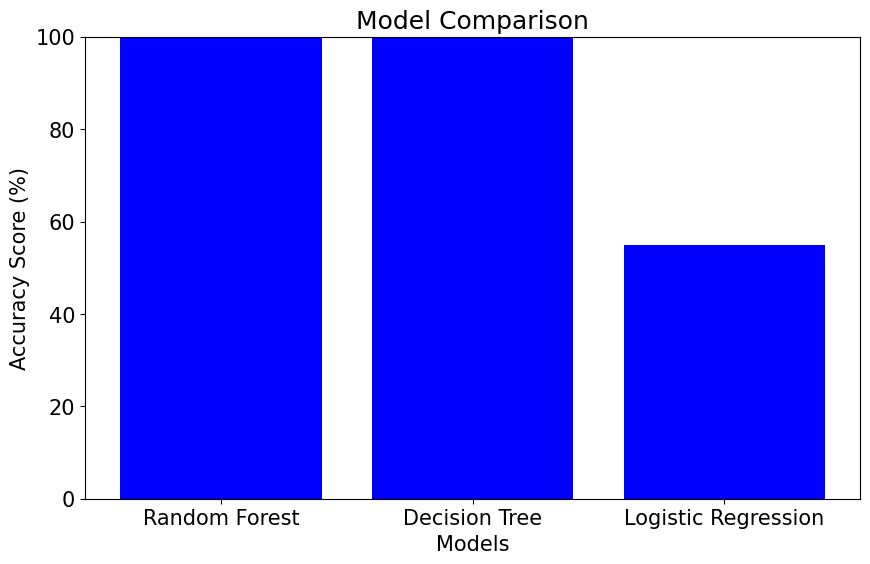

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with model names and scores
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_log, acc_random_forest, acc_decision_tree]
})

# Sort the DataFrame by score in descending order
sorted_model = models.sort_values(by='Score', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_model['Model'], sorted_model['Score'], color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.title('Model Comparison')
plt.ylim(0, 100)

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame to store feature importances
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.round(decision_tree.feature_importances_, 3)
})

# Sort the DataFrame by importance in descending order and set 'feature' as index
importances_sorted = importances.sort_values('Importance', ascending=False).set_index('Feature')

# Print the top 15 most important features
print(importances_sorted.head(15))


                  Importance
Feature                     
duration_month         0.232
sno                    0.096
age                    0.095
poi                    0.094
purpose                0.076
job_type               0.064
credit_history         0.045
employment_st          0.042
property_type          0.040
resident_since         0.040
credits_no             0.033
savings_acc            0.028
telephone              0.025
installment_type       0.021
acc_info               0.018


In [ ]:
# List of columns to include in the feature set
columns_to_include = [
    'sno', 'acc_info', 'duration_month', 'credit_history', 'purpose',
    'savings_acc', 'employment_st', 'poi', 'personal_status', 'gurantors',
    'resident_since', 'property_type', 'age', 'installment_type', 'housing_type',
    'credits_no', 'job_type', 'liables', 'telephone', 'foreigner'
]

# Select the specified columns from the test DataFrame to create the feature set
x_real = test[columns_to_include]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with a fixed random state for reproducibility
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree Classifier using the training data
decision_tree.fit(X_train, y_train)

# Predict using the Decision Tree Classifier on the real test data
Y_pred = decision_tree.predict(x_real)


In [76]:
output = pd.DataFrame({'sno': test['sno'], 'Group_no': Y_pred})

# Save the DataFrame as a CSV file
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")



Your submission was successfully saved!
